In [8]:
%pip install yfinance
%pip install plotly
%pip install numpy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
ibov = yf.download("^BVSP", start='2000-01-01')['Adj Close']
ibov

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03     16930.0
2000-01-04     15851.0
2000-01-05     16245.0
2000-01-06     16107.0
2000-01-07     16309.0
                ...   
2023-07-31    121943.0
2023-08-01    121248.0
2023-08-02    120859.0
2023-08-03    120586.0
2023-08-04    119508.0
Name: Adj Close, Length: 5841, dtype: float64

In [21]:
fig01 = px.histogram(ibov, color_discrete_sequence=['lightseagreen'])
fig01.add_vline(x=np.mean(ibov), line_width=3, line_color='red')
fig01.add_vline(x=np.median(ibov), line_width=3, line_dash='dash', line_color='red')

Adj close do IBOV tem uma distribuição trimodal, não é recomendado criar modelo em cima desse tipo de distribuição.
Nesse caso seria melhor usar o retorno no lugar do preço.

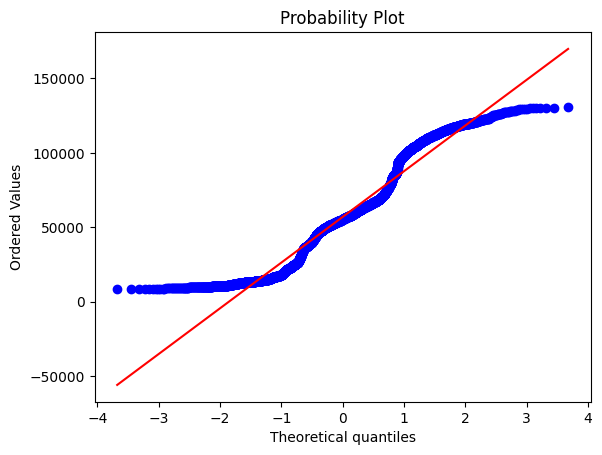

In [22]:
stats.probplot(ibov, dist='norm', plot=plt)
plt.show()

In [14]:
retorno_ibov = ibov.pct_change()
retorno_ibov.dropna(inplace=True)
retorno_ibov

Date
2000-01-04   -0.063733
2000-01-05    0.024856
2000-01-06   -0.008495
2000-01-07    0.012541
2000-01-10    0.043718
                ...   
2023-07-31    0.014611
2023-08-01   -0.005699
2023-08-02   -0.003208
2023-08-03   -0.002259
2023-08-04   -0.008940
Name: Adj Close, Length: 5840, dtype: float64

In [23]:
fig02 = px.histogram(retorno_ibov, color_discrete_sequence=['lightseagreen'])
fig02.add_vline(x=np.mean(retorno_ibov), line_width=3, line_color='red')
fig02.add_vline(x=np.median(retorno_ibov), line_width=3, line_dash='dash', line_color='red')

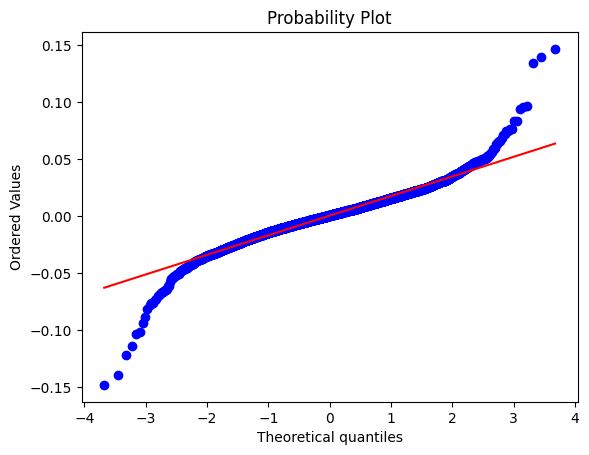

In [24]:
stats.probplot(retorno_ibov, dist='norm', plot=plt)
plt.show()

In [18]:
stats.skew(retorno_ibov)

-0.12265347487646307

In [19]:
stats.kurtosis(retorno_ibov)

6.225735243965202